    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a Neural Network Model

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.externals.joblib import dump,load
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Load ML dataset

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [4]:
ML_dataset.head(10)

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276,0.756466
1,108,9331,90,7561.21,2681,110.0,11,0.869739
2,32,8930,200,14549.85,7587,307.2,65,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461,0.724479
5,108,8444,102,22124.43,4710,160.0,13,0.902614
6,70,8309,7054,428096.87,344274,11939.0,420,0.690766
7,88,8894,2573,266098.57,115667,3897.8,318,0.834835
8,91,9415,563,31341.84,14043,608.1,151,0.290058
9,70,9353,116,2605.35,9055,307.0,29,0.367052


Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [6]:
X = ML_dataset[Labels] #input
y = ML_dataset["brand_percent_spending"] #labels


PCA feature selection w/ Scaling

In [7]:
X = StandardScaler().fit_transform(X)#NN performs better with normalized data

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
PCA = PCA(n_components = 'mle')
X = PCA.fit_transform(X)


In [9]:
print(PCA.explained_variance_ratio_)  

[0.56906204 0.15995163 0.13578093 0.07378827 0.05048682 0.01045913]


Split Data Into Test and Train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into Neural Network with Loaded Parameters

In [11]:
best_model =load("Model_Weights\\NNet\\NNet_best_model")
print(best_model)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)


In [12]:
MLPR = best_model
MLPR.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

Predictions

In [13]:
y_pred = MLPR.predict(X_test)

In [14]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
321233,0.551067,0.680307
318593,0.748372,0.674664
535255,0.713459,0.677019
91670,0.709970,0.705050
180508,0.752367,0.670670
38768,0.886798,0.975651
69203,0.364909,0.854263
145261,0.742159,0.660911
472493,0.996143,0.991191
118122,0.765874,0.745122


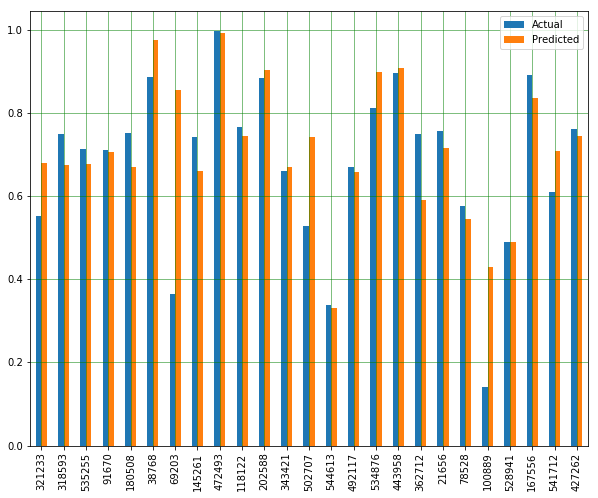

In [26]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


Text(0.5, 1.0, 'Neural Network Model')

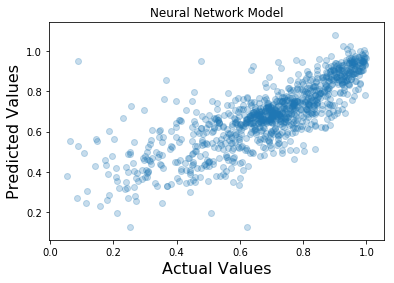

In [23]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual Values", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted Values",  fontsize = 16)
plt.title("Neural Network Model")

Statistics

In [17]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.6227138246797814


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.08787576780520029
Mean Squared Error: 0.015452070565363778


In [19]:
metrics_df = pd.read_csv("data\metrics_df.csv")
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Neural Network"}, ignore_index=True)

In [20]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
46,"['specialty_description', 'nppes_provider_city...",0.621503,0.087354,0.015451,Neural Network
47,"['specialty_description', 'nppes_provider_city...",0.683437,0.078626,0.012899,Random Forest
48,"['specialty_description', 'nppes_provider_city...",0.626525,0.087325,0.015342,Neural Network
49,"['specialty_description', 'nppes_provider_city...",0.683719,0.078586,0.012941,Random Forest
50,"[specialty_description, nppes_provider_city, t...",0.622714,0.087876,0.015452,Neural Network


In [21]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save the Trained Model

In [22]:
dump(MLPR, "Model_Weights\\NNet\\NNet_trainedLoaded") 

['Model_Weights\\NNet\\NNet_trainedLoaded']